# **P1 Graded Challenge 1** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004

**Problem:**

**Objective:**
Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.





### Table of content

1. INTRODUCTION
  - Introduction
  - Objective
  - Table of Contents
2. Importing Libraries
3. DATA LOADING
  - Setting up Kaggle
  - Downloading and importing dataset
  - Simple Data Understanding
  - Removing unused columns
4. Exploratory Data Analysis (EDA) and Analysis
  - Descriptive Statistics
  - Uni-Variate Analysis
  - Bi-Variate Analysis
5. Data Preprocessing
  - Dealing with duplicates
  - Dealing with Missing values
  - Dealing with Outliers
6. Feature Engineering
  - Splitting Data
  - Encoding
  - Scaling
7. Model Definition
8. Model Training
9. Model inference
10. Model evaluation and Analysis
10. Conceptual Problems
11. Conclusion/Analysis
12. Additional Learning Resources


## 2. IMPORT LIBRARIES 💽

In [387]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("crest")

#feature engineering
# category-continuous relationship
from scipy.stats import f_oneway

#numeric-numeric relationship
from scipy.stats import pearsonr

#----------------------------

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#model
from sklearn.linear_model import LinearRegression

#evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#save model
import joblib

#----------------------------
#So that I can see all columns when displaying dataframe for the first time.
pd.set_option('max_columns',200)

## 3. DATA LOADING 💽

First of wall we will download and setup kaggle because our datasource is from:

https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [388]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [389]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (7).json


{'kaggle.json': b'{"username":"karelhutajulu","key":"a8694d5c28419c7b58d5a6bff1814eb7"}'}

In [390]:
#Create folder in kaggle root
!mkdir ~/.kaggle 

# Copy kaggle.json to kaggle folder
# !cp 'kaggle.json' ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [391]:
!chmod 600 ~/.kaggle/kaggle.json

Next i verify if the `.json` file has been copied successfuly

In [392]:
!ls ~/.kaggle

kaggle.json


Then I download the dataset from kaggle and unzip the download

In [393]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [394]:
# -d to create a new folder named `dataset`
!unzip uber-and-lyft-dataset-boston-ma.zip -d dataset

Archive:  uber-and-lyft-dataset-boston-ma.zip
replace dataset/rideshare_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/rideshare_kaggle.csv  


Read the dataset using `pd.read_csv`

In [395]:
df = pd.read_csv('/content/dataset/rideshare_kaggle.csv')

### Simple Data Understanding

To make sure that our dataset has been imported correctly and to see an overview of what data i am working with i will do some simple data understanding.

In [396]:
#Display top 3 rows of dataframe df
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [397]:
#Check the different datatypes
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [398]:
#Check the size of our dataframe using `shape`
original_shape = df.shape

### Removing unused Columns

Immedeatly I will be removing the following columns that I wont be using in this notebook:

- Id: Used only for unique records.
- Datetime, Timestamp: We already have month, day, hour.
- Timezone: Only one timezone caetegory, so we can remove it.
- longitude and latitude: We already have the destination name
- long summary and icon: We will only use short summary
- source and destination: We use distance (removed later in the notebook)


In [399]:
df = df.drop(['id', 'datetime', 'timezone', 'timestamp', 'latitude', 'longitude', 'long_summary', 'icon'], axis=1)

print("Original shape:", original_shape)

new_shape = df.shape
print("Shape after dropping columns:", new_shape)


Original shape: (693071, 57)
Shape after dropping columns: (693071, 49)


## 4. EXPLORATORY DATA ANALYSIS (EDA) and Analysis 🎁




The purpose of EDA is to identify patterns, relationships, and potential issues. I will began by searching the term 'Surge_pricing' as it is not familiar to me. 

A datascientist job is not only to process the data but also to understand it.






### What Is Surge Pricing?
Surge pricing is a variable in the Uber pricing model that multiplies fares when rider demand is higher than driver supply.

*Source*: https://www.ridester.com/surge-pricing/ 

### A. Descriptive Statistic

We will use `df.describe()` to see the central tendency of our data and see if there are any anomalies in our numerical datas. This gives us a broad idea of our dataset.

In [400]:
df.describe()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09,35.320000,1.544836e+09,38.120000,1021.860000,303.000000,1.000000,0.000000,9.996000,331.800000,1.544789e+09,1.544822e+09,0.790000,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,23.000000,30.000000,12.

**My Obesrvation**


---



All results seem to be normal, the dates are in the normal date range (ex: no days value are >7). There are also no negative values.

###2. Univariate Analysis

Based on our objective we can agree that our `target` variable is the column `price`. Before we dive into the correlations between the target and the feature I graphed some charts to better understand the data.

Displaying the columns and different categories in column with datatype object/category.

In [401]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'short_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')


In [402]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear '

**A. CAB_TYPE categories**

First I want to see if our dataset have the same amount of data for the 2 different cab_types



<AxesSubplot:xlabel='cab_type', ylabel='count'>

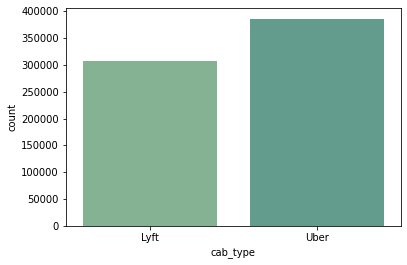

In [403]:
sns.countplot(x='cab_type', data=df)

**My Obesrvation**


---


Dataset is divided almost equally between 2 datasets, this can help reduce bias when creating the linear regression model.

**B. Price distribution**



In [404]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

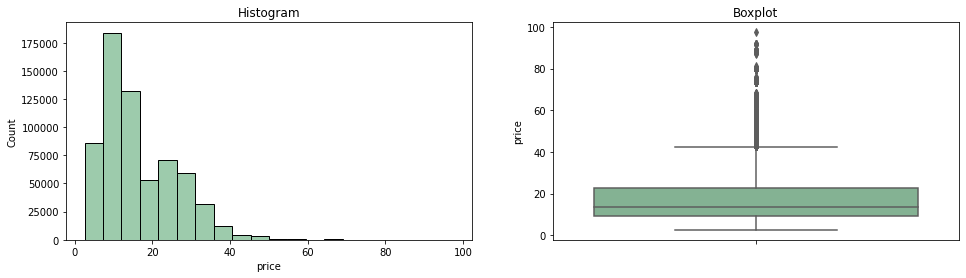


Skewness Value :  1.0457470560899256


In [405]:
diagnostic_plots(df, 'price')
print('\nSkewness Value : ', df['price'].skew())

**My Obesrvation**


---


A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.This may be caused by outliers, we will check the outliers in the next section.

**C. Distribution of orders throughout the day and week**



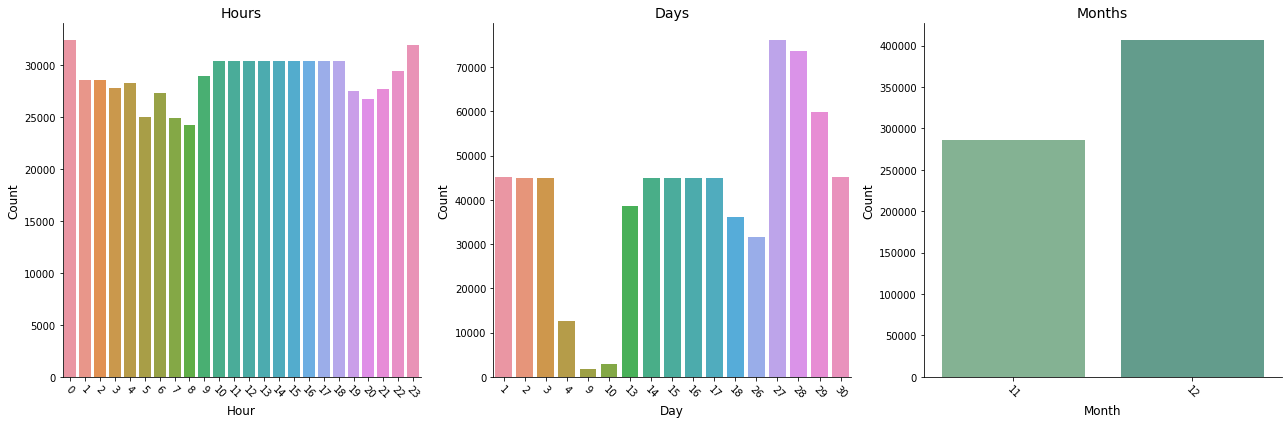

In [406]:
# define the function to create the subplot
def create_subplot(ax, x_col, title):
    sns.countplot(x=x_col, data=df, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_col.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    sns.despine(ax=ax)
    #Slanted label used becuase of the long destination and source categorie names.
    ax.tick_params(axis='x', labelrotation=-45)
# create the subplots
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

create_subplot(axes[0], 'hour', 'Hours')
create_subplot(axes[1], 'day', 'Days')
create_subplot(axes[2], 'month', 'Months')

# adjust the layout and display the plots
plt.tight_layout()
plt.show()

**My Obesrvation**


---
Data is only from month 11,12. This might be good as 'seasonality' might not be a factor.

**D. Distribution of orders from different source and destination**



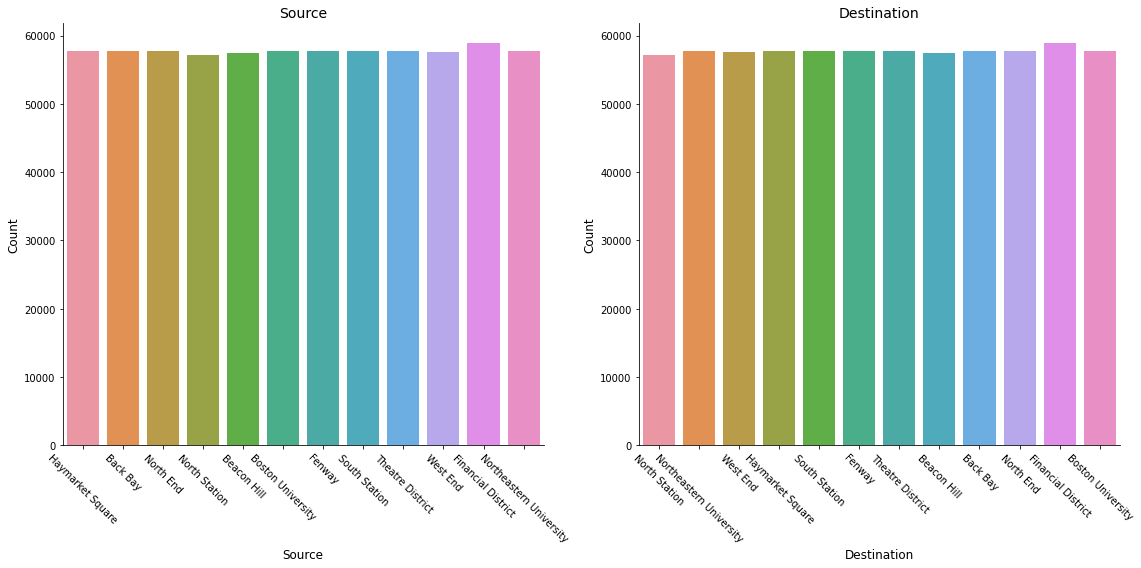

In [407]:
# create the subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

create_subplot(axes[0], 'source', 'Source')
create_subplot(axes[1], 'destination', 'Destination')


# adjust the layout and display the plots
plt.tight_layout()
plt.show()

**My Obesrvation**


---


**E. Are there any difference between the different names and product_id?**

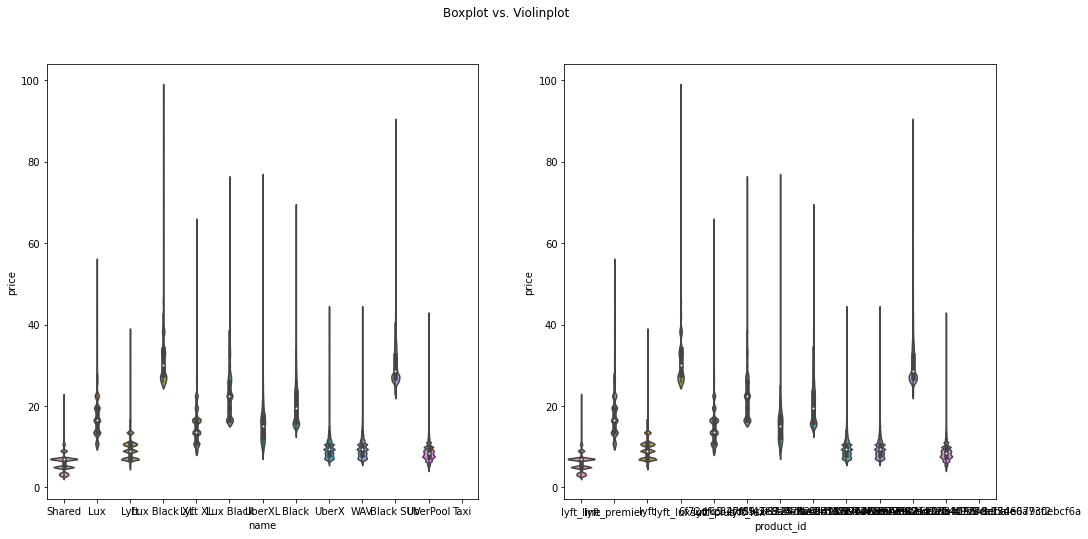

In [408]:

# create the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(17, 8))

# create the boxplot and assign it to the left subplot
sns.violinplot(x='name', y='price', data=df, ax=axs[0])

# create the violinplot and assign it to the right subplot
sns.violinplot(x='product_id', y='price', data=df, ax=axs[1])

# set the title for the figure
fig.suptitle('Boxplot vs. Violinplot')

# display the figure
plt.show()

**My Obesrvation**


---
Yes, some product are more expensive than the other.
We will drop `product_id` because it contains some categories that does not have clear naming. It is also shares the same value with the column `name`.

In [409]:
df = df.drop(['product_id'], axis=1)

**Are there any hours/days that has a higher price compared to the rest?**

<AxesSubplot:xlabel='hour', ylabel='price'>

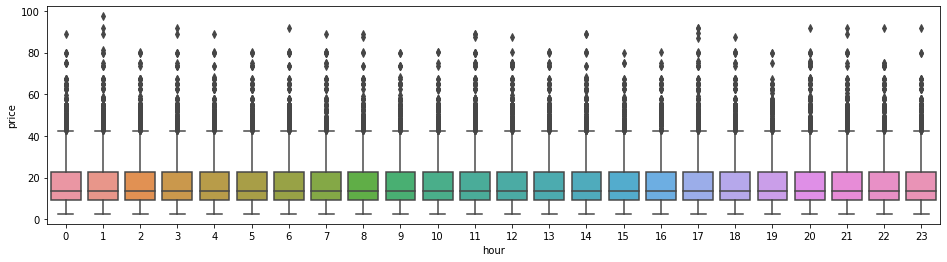

In [410]:
f, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='hour', y='price', data=df)

<AxesSubplot:xlabel='day', ylabel='price'>

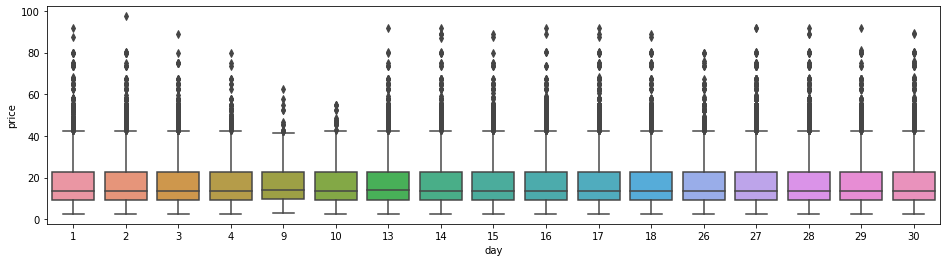

In [411]:
f, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='day', y='price', data=df)

**My Obesrvation**



---

No

In [412]:
df = df.drop(['hour','day','month'], axis=1)

**F. Relationship between distance and price**

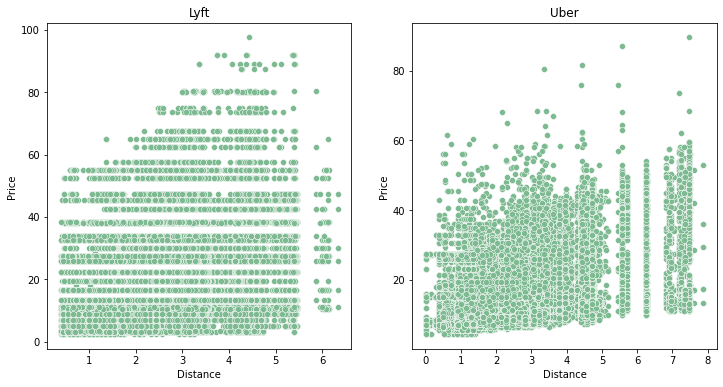

In [413]:

# create two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create scatter plot for 'Lyft' category
sns.scatterplot(x='distance', y='price', data=df[df['cab_type']=='Lyft'], ax=ax1)
ax1.set_title('Lyft')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Price')

# create scatter plot for 'Uber' category
sns.scatterplot(x='distance', y='price', data=df[df['cab_type']=='Uber'], ax=ax2)
ax2.set_title('Uber')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Price')

# display the plots
plt.show()


In [414]:
# Replace Inf values with NaN in distance and price columns
df['distance'] = df['distance'].replace([np.inf, -np.inf], np.nan)
df['price'] = df['price'].replace([np.inf, -np.inf], np.nan)

# Drop any rows that contain NaN values in distance or price columns
df = df.dropna(subset=['distance', 'price'], how='any')

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df['distance'], df['price'])

# Print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))

Pearson correlation coefficient: 0.345


**My Obesrvation**



---

A Pearson correlation coefficient of 0.345 indicates a moderate positive correlation between the "price" and "distance" variables.

**G.Relationship between surge_multiplier and price**

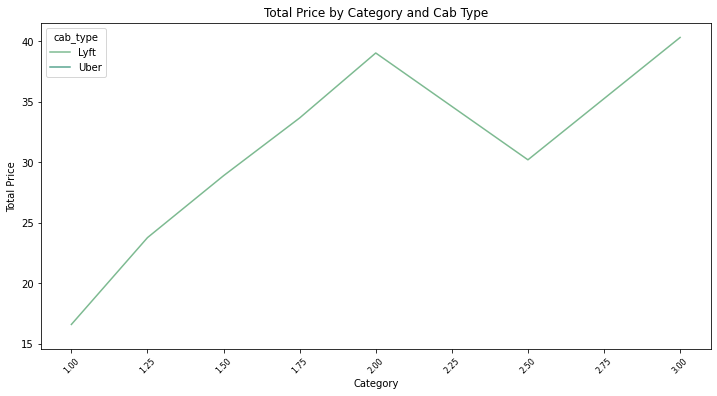

In [415]:
# calculate the sum of price for each category in short_summary and cab_type
df_sum = df.groupby(['surge_multiplier', 'cab_type']).mean().reset_index()

# create the line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x='surge_multiplier', y='price', hue='cab_type', data=df_sum)

# set the title and labels for the graph
plt.title('Total Price by Category and Cab Type')
plt.xlabel('Category')
plt.ylabel('Total Price')

# adjust the x-axis tick parameters
ax.xaxis.set_tick_params(rotation=45, labelsize=8)

# display the graph
plt.show()


In [416]:

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df['surge_multiplier'], df['price'])

# Print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))

Pearson correlation coefficient: 0.240


**My Obesrvation**

---

A Pearson correlation coefficient of 0.241 indicates a positive but weak correlation between the two variables being analyzed.

**H. Is there any relationship between category and price?**

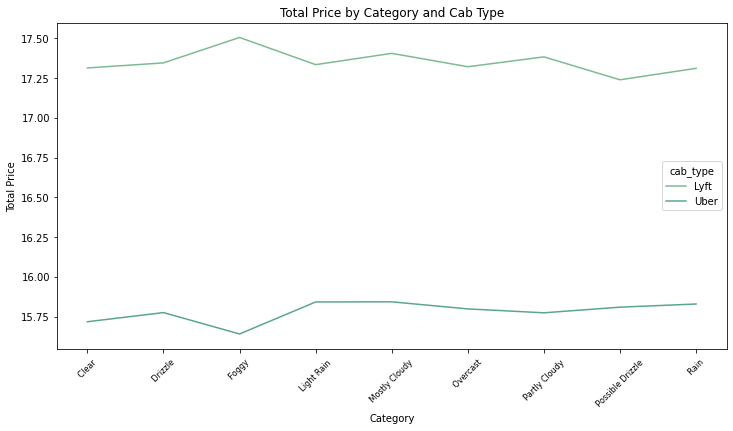

In [417]:
# calculate the sum of price for each category in short_summary and cab_type
df_sum = df.groupby(['short_summary', 'cab_type']).mean().reset_index()

# create the line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x='short_summary', y='price', hue='cab_type', data=df_sum)

# set the title and labels for the graph
plt.title('Total Price by Category and Cab Type')
plt.xlabel('Category')
plt.ylabel('Total Price')

# adjust the x-axis tick parameters
ax.xaxis.set_tick_params(rotation=45, labelsize=8)

# display the graph
plt.show()


Because there is only 1 feature to compare to the target we use `One Way Anova Test` to see if there are any relation.

In [418]:
# create separate price arrays for each category in short_summary
mostly_cloudy = df[df['short_summary'] == ' Mostly Cloudy ']['price']
rain = df[df['short_summary'] == ' Rain ']['price']
clear = df[df['short_summary'] == ' Clear ']['price']
partly_cloudy = df[df['short_summary'] == ' Partly Cloudy ']['price']
overcast = df[df['short_summary'] == ' Overcast ']['price']
light_rain = df[df['short_summary'] == ' Light Rain ']['price']
foggy = df[df['short_summary'] == ' Foggy ']['price']
possible_drizzle = df[df['short_summary'] == ' Possible Drizzle ']['price']
drizzle = df[df['short_summary'] == ' Drizzle ']['price']

# conduct one-way ANOVA test
f_statistic, p_value = f_oneway(mostly_cloudy, rain, clear, partly_cloudy, overcast, light_rain, foggy, possible_drizzle, drizzle)

# set alpha level for hypothesis testing
alpha = 0.05

# print results
print('One-way ANOVA Test Results')
print('--------------------------')
print(f'F-Statistic: {f_statistic:.3f}')
print(f'p-value: {p_value:.3f}')
if p_value < alpha:
    print('Result is significant. Reject null hypothesis.')
else:
    print('Result is not significant. Fail to reject null hypothesis.')

One-way ANOVA Test Results
--------------------------
F-Statistic: 1.043
p-value: 0.401
Result is not significant. Fail to reject null hypothesis.


**My Obesrvation**



---

The test result shows an F-statistic of 1.043 and a p-value of 0.401. Since the p-value is greater than the alpha level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that there is a significant difference in car prices among the weather categories.

Therefore, based on the one-way ANOVA test, weather category does not have a significant impact on car prices in the dataset.

### I want to check the correlation of our temperature and weather related features with our target feature (Price)

In [419]:
temperature_columns= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [420]:
df_temp = df[temperature_columns]

<AxesSubplot:>

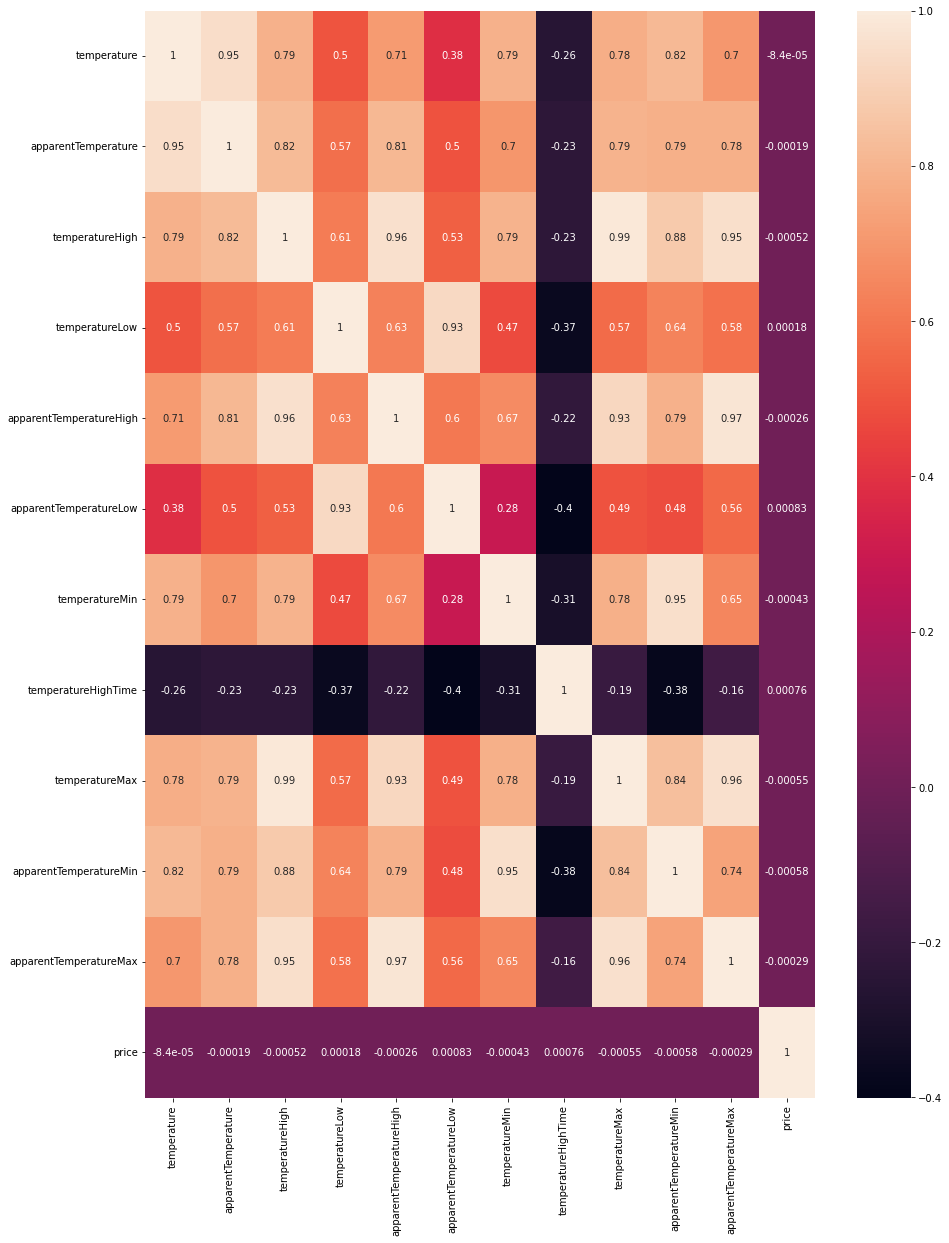

In [421]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

A correlation coefficient (typically denoted as r) of 0.3 or lower is often considered to be a weak or low correlation.

All the temperature columns has weak correlation with our target 'price' we will drop all the columns.

In [422]:
df = df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
df.shape

(637976, 34)

Now for weather related columns

In [423]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

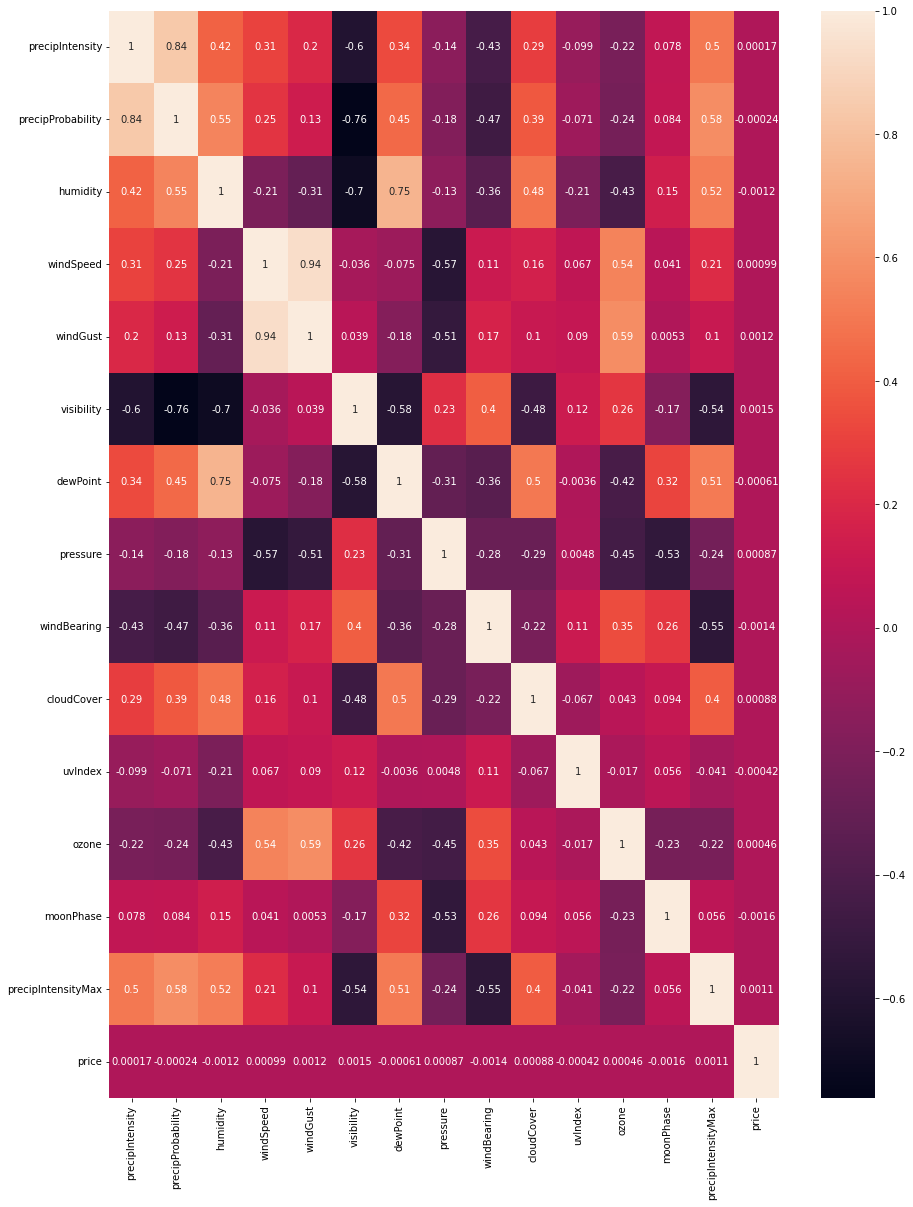

In [424]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

In [425]:
df = df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
df.shape

(637976, 20)

We drop the time variables related to temperature and weather

In [426]:
df = df.drop(['windGustTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime','sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'],axis=1)
df.shape

(637976, 9)

### Do we need visibility column?

In [427]:
# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df['visibility.1'], df['price'])

# Print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))

Pearson correlation coefficient: 0.001


In [428]:
df = df.drop(['visibility.1'],axis=1)

## 5. Data Pre-processing

### A. Dealing with duplicates


In [429]:
df.duplicated().sum()

430388

In [430]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### B. Dealing with Missing values


In [431]:
df.isna().sum() 
#already removed previously in the notebook when plotting scatterplot

source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
short_summary       0
dtype: int64

In [432]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 0.00%


In [433]:
df.dropna(inplace=True)
df.shape

(207588, 8)

### C. Dealing with Outliers

In [434]:
# Calculate the lower and upper quartiles
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)f
iqr = q3 - q1

# Identify the values that fall outside the IQR
outliers = df[(df['price'] < q1 - 1.5*iqr) | (df['price'] > q3 + 1.5*iqr)]

There are multiple type of outliers, the outliers can be caused by data Entry Errors or data processing errors. It could also be a Natural outlier.

In order to determine whether the outlier is natural or not is by seeing if there are outliers that does not make any sense.

In order to do so I look for the max price in our dataset and compare it to the average price with the same source and destination.

In [435]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
597071,Financial District,Fenway,Lyft,Lux Black XL,97.5,4.43,2.0,Clear


In [436]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]


,source,destination,mean
25,Financial District,Fenway,25.366182


In [437]:
df = df.drop(['source','destination'], axis=1)

This is really far from the average price for trips wit the same destination and source even after considering there is a siege multiplier.

Since this is not a natural outlier we will drop the outliers before splitting the data.

In [438]:
# drop the rows containing outliers from the original dataframe "df"
df = df.drop(outliers.index)

In [463]:
df_eda = df

In [464]:
# Save the dataframe to a CSV file
df.to_csv('uber_lyft.csv', index=False)

## 6. Feature Engineering 🔧

### A. Splitting Data





**Split dataset to X and Y variables**

In [439]:
#split Fitur dan target
x= df.drop('price', axis=1)
y= df['price']


**Perform 80/20 Data split**

In [440]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Data Dimension**

In [441]:
x_train.shape, y_train.shape

((164514, 5), (164514,))

In [442]:
x_test.shape, y_test.shape

((41129, 5), (41129,))

###B. One Hot Encoding

In [443]:
# Membuat instance dari OneHotEncoder
encoder = OneHotEncoder(sparse=True)

# Melakukan one-hot encoding pada kolom 'color' dan 'size'
one_hot_encoded = encoder.fit_transform(df[['short_summary','name','cab_type',]])

# One-hot encode the categorical variables in the training set
encoder = OneHotEncoder(sparse_output=True)
one_hot_encoded_train = encoder.fit_transform(x_train[['short_summary', 'name', 'cab_type']])
feature_names = encoder.get_feature_names_out(['short_summary', 'name', 'cab_type'])
encoded_df_train = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_train, columns=feature_names)

# One-hot encode the categorical variables in the testing set using the same encoder and feature names as the training set
one_hot_encoded_test = encoder.transform(x_test[['short_summary', 'name', 'cab_type']])
encoded_df_test = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_test, columns=feature_names)

# Combine the encoded training and testing sets with their respective original dataframes
X_train_encoded = pd.concat([x_train.reset_index(drop=True), encoded_df_train], axis=1)
X_test_encoded = pd.concat([x_test.reset_index(drop=True), encoded_df_test], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [444]:
# Drop the original categorical features from the encoded training dataframe
X_train_encoded = X_train_encoded.drop(['short_summary', 'name', 'cab_type'], axis=1)

# Drop the original categorical features from the encoded testing dataframe
X_test_encoded = X_test_encoded.drop(['short_summary', 'name', 'cab_type'], axis=1)


In [445]:
X_train_encoded.head(3)

,distance,surge_multiplier,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,1.97,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.34,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###C. Scaling


Distance skewness: 0.82
Surge multiplier skewness: 4.87


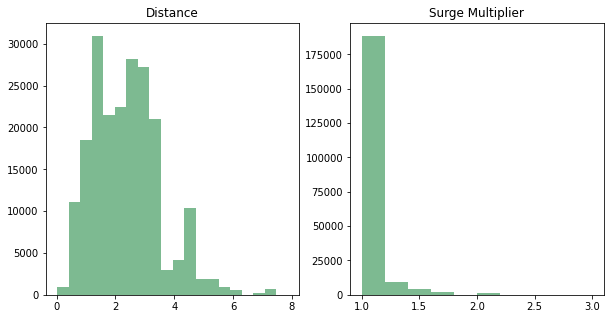

In [446]:
# Create histograms for the distance and surge_multiplier features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].hist(df['distance'], bins=20)
axes[0].set_title('Distance')

axes[1].hist(df['surge_multiplier'], bins=10)
axes[1].set_title('Surge Multiplier')

# Calculate the skewness of the distance and surge_multiplier features
distance_skew = df['distance'].skew()
surge_skew = df['surge_multiplier'].skew()

print(f"Distance skewness: {distance_skew:.2f}")
print(f"Surge multiplier skewness: {surge_skew:.2f}")

plt.show()

Because our distance is normally distributed and our surge multiplier is highly skewed we will use 2 different types of scaling. Standard scaler and min max scaler.



In [455]:
# Create a StandardScaler object for distance column
distance_scaler = StandardScaler()
X_train_distance_scaled = distance_scaler.fit_transform(x_train[['distance']])
X_test_distance_scaled = distance_scaler.transform(x_test[['distance']])

# Create a MinMaxScaler object for surge_multiplier column
surge_scaler = MinMaxScaler()
X_train_surge_scaled = surge_scaler.fit_transform(x_train[['surge_multiplier']])
X_test_surge_scaled = surge_scaler.transform(x_test[['surge_multiplier']])

# Combine the scaled features
X_train_combined = np.concatenate([X_train_distance_scaled, X_train_surge_scaled], axis=1)
X_test_combined = np.concatenate([X_test_distance_scaled, X_test_surge_scaled], axis=1)

# Display the scaled features
print('X_train_combined:\n', X_train_combined)
print('X_test_combined:\n', X_test_combined)


X_train_combined:
 [[-0.35680051  0.        ]
 [-1.19289258  0.        ]
 [-0.89982938  0.        ]
 ...
 [ 0.94474487  0.        ]
 [ 0.41033551  0.        ]
 [ 1.08265697  0.        ]]
X_test_combined:
 [[ 0.41033551  0.        ]
 [ 0.56548661  0.        ]
 [-1.05498049  0.        ]
 ...
 [-0.05511781  0.        ]
 [-1.10669753  0.        ]
 [ 3.95295242  0.        ]]


In [456]:
X_train = pd.concat([X_train_encoded.reset_index(drop=True), pd.DataFrame(X_train_combined, columns=['distance1', 'surge_multiplier1'])], axis=1)
X_test = pd.concat([X_test_encoded.reset_index(drop=True), pd.DataFrame(X_test_combined, columns=['distance1', 'surge_multiplier1'])], axis=1)

X_train = X_train.drop(['distance','surge_multiplier'], axis=1)
X_test = X_test.drop(['distance','surge_multiplier'], axis=1)

In [457]:
X_train

,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,distance1,surge_multiplier1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.356801,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.192893,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.899829,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.856732,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.798076,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164509,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.080839,0.0
164510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.235990,0.0
164511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.944745,0.0
164512,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.410336,0.0


##7. Model Definition

Question: Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

The linear regression model defined below is a machine learning algorithm used for predicting the price of a used car based on various features such as year, mileage, tax, and engine size.


---



*Metrics Used*

The reason for using linear regression is that it is a simple and effective algorithm for predicting continuous variables. It assumes a linear relationship between the features and the target variable, which is suitable for this problem as the features are numerical and continuous.


---



*Hyperparameters*

The hyperparameters used in this model are the default parameters for linear regression. The fit_intercept parameter is set to True, which adds an intercept term to the regression equation, and the normalize parameter is set to False, which means that the features are not normalized before fitting the model.



##8. Model Training

In [458]:
# Create an instance of the LinearRegression class
model_lin_reg = LinearRegression()

# Fit the model to the training data
model_lin_reg.fit(X_train, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [465]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Coefficient     : ', model_lin_reg.coef_)
     

Intercept :  5377307724778.852
Coefficient     :  [ 2.47842272e+12  2.47842272e+12  2.47842272e+12  2.47842272e+12
  2.47842272e+12  2.47842272e+12  2.47842272e+12  2.47842272e+12
  2.47842272e+12 -1.47337420e+13 -1.47337420e+13 -1.08017241e+13
 -1.08017241e+13 -1.08017241e+13 -1.08017241e+13 -1.08017241e+13
 -1.08017241e+13 -1.47337420e+13 -1.47337420e+13 -1.47337420e+13
 -1.47337420e+13  2.94599370e+12  6.87801154e+12  3.39908600e+00
  2.86830215e+01]


##8b.Model Evaluation and Analysis 🔊

The metrics used to evaluate the performance of the model are the R-squared score, which measures the goodness of fit of the regression line to the data, and the mean squared error (MSE), which measures the average of the squared differences between the predicted values and the actual values.

The model is first trained on the training data using the scaled features and the target variable. Then, the performance of the model is evaluated on the test data by making predictions on the scaled features and comparing them to the actual target values. The R-squared score and MSE are calculated to evaluate the performance of the model.

In [460]:
print('-------- TRAIN ---------')
y_train_pred = model_lin_reg.predict(X_train)
print('MAE:',mean_absolute_error(y_train,y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('RMSE:',mean_squared_error(y_train,y_train_pred,squared=False))

# Calculate the R-squared score
r2 = r2_score(y_train, y_train_pred)
print('R-squared score:', r2)
     

-------- TRAIN ---------
MAE: 2.201091972985582
MSE: 8.63672264071615
RMSE: 2.938830148327077
R-squared score: 0.9117092581106236


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [462]:
print('-------- TEST ---------')
y_test_pred = model_lin_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',mean_squared_error(y_test,y_test_pred,squared=False))

# Calculate the R-squared score
r2 = r2_score(y_test,y_test_pred)
print('R-squared score:', r2)


-------- TEST ---------
MAE: 2.1998430956183594
MSE: 8.581176815839417
RMSE: 2.9293645754394273
R-squared score: 0.9122426942712106


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


It looks like our model has a relatively low MAE and RMSE, indicating that it is making accurate predictions on average. Additionally, the R-squared score of 0.91 indicates that the model is able to explain a large proportion of the variability in the target variable.

The same result between train and test indicates that the model is just right, i.e., it is neither overfitting nor underfitting the data.

### Strength and Weaknesses

**Pros:**
(Business Related)
- The model is simple and easy to interpret, which can be useful for stakeholders who may not have a technical background.
- The model can provide insight into which features have a significant impact on the target variable, which can be useful for making business decisions.
- The model can make predictions based on new data, which can be helpful for forecasting future sales and making business plans.


---


**Weaknesses:**
- The linear regression model assumes a linear relationship between the features and the target variable, which may not always be the case in real-world scenarios. This could result in inaccurate predictions and business decisions.
- The model may not be able to capture complex relationships between the features and the target variable, which could result in underfitting.

###How to improve?

To improve the model, here are some ideas for the next steps:

- Feature engineering: creating new features or transforming existing features to better capture relationships between the features and the target variable.
- Trying different types of models: if the linear regression model is not performing well, trying different types of models such as decision trees, random forests, or neural networks.

##9. Model Saving

In [476]:
# Save the trained model using joblib
joblib.dump(model_lin_reg, 'model_lin_reg.joblib')

['model_lin_reg.pkl']

##10. Model Inference

Done in another notebook:

https://github.com/H8-Assignments-Bay/p1-ftds004-hck-g1-karelhutajulu/blob/main/P1G1_model_inference.ipynb

##11. Conceptual problems

Answer the following questions:


###1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

- The first assumption is that there is a linear relationship between the dependent variable and each independent variable. This means that as the independent variable changes, the dependent variable changes in a consistent and predictable way. 


- The second assumption is that there is little or no multicollinearity among the independent variables. This means that the independent variables are not too highly correlated with each other, as high correlation can lead to unstable estimates of the regression coefficients. 

- By ensuring that these assumptions hold, we can create a reliable model that accurately predicts the price of a ride based on the independent variables.

###2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !


In [466]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Coefficient: ', model_lin_reg.coef_)

Intercept :  5377307724778.852
Coefficient:  [ 2.47842272e+12  2.47842272e+12  2.47842272e+12  2.47842272e+12
  2.47842272e+12  2.47842272e+12  2.47842272e+12  2.47842272e+12
  2.47842272e+12 -1.47337420e+13 -1.47337420e+13 -1.08017241e+13
 -1.08017241e+13 -1.08017241e+13 -1.08017241e+13 -1.08017241e+13
 -1.08017241e+13 -1.47337420e+13 -1.47337420e+13 -1.47337420e+13
 -1.47337420e+13  2.94599370e+12  6.87801154e+12  3.39908600e+00
  2.86830215e+01]


In [470]:
X_train.columns

Index(['short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain ', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'cab_type_Lyft', 'cab_type_Uber', 'distance1', 'surge_multiplier1'],
      dtype='object')

y = 2.47842272e+12*(short_summary_ Clear ) + ....... +   6.87801154e+12*(cab_type_Uber) * 3.39908600e+00*(distance1) + 2.86830215e+01*(surge_multiplier1) + 5377307724778.852

**Observation:** 

The large coefficients for `short_summary_Clear`, `distance1`, and `surge_multiplier1` suggest that these features have a positive effect on the target variable, while the even larger coefficient for `cab_type_Uber` suggests that this feature has an even stronger positive effect on the target variable.

However, the extremely large coefficients and intercept value suggest that there may be issues with the model, such as overfitting

Contoh kriteria analisa yang baik diantaranya adalah: 

1. Terdapat penjelasan macam-macam hasil metric evaluasi dan interpretasinya terhadap kasus yang diselesaikan.
2. Dapat menjelaskan KELEBIHAN dan KELEMAHAN dari model yang dibuat DENGAN KAITANNYA DENGAN DOMAIN BUSINESS YANG DIHADAPI yang dibuktikan dengan eksplorasi sederhana (grafik, plot, teori, dll).
3. Dapat memberikan statement untuk improvement selanjutnya dari model yang dibuat. 
4. Dapat menyebutkan insight yang dapat diambil setelah proses EDA, dll.

## 13. Additional Learning Resources

###Note: I attach all my additional learning resources for future learning reference. All the references are divided based on which part of the machine learning process it talks about.



---



**EDA**
1. https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/
2. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/



---

**Linear Regression and assumptions**
1. https://www.statology.org/linear-regression-assumptions/
2. https://www.youtube.com/watch?v=R15LjD8aCzc&ab_channel=DataProfessor
3. https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/learn/lecture/2707026#overview

---

**Saving and Inference**
1. https://www.geeksforgeeks.org/saving-a-machine-learning-model/

---

**Others**
1. https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/
2. https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
3. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/